In [7]:
# importing libraries
import pandas as pd

from IPython.display import display
from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

In [10]:
# data_dir = Path("C:\Users\udayr\")
red_wine = pd.read_csv(r"C:\Users\udayr\red-wine.csv")
# red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
            layers.Dense(units = 512, activation = 'relu', input_shape = [11]),
            layers.Dense(units = 512, activation = 'relu'),
            layers.Dense(units = 512, activation = 'relu'),
            layers.Dense(units = 1)
])

In [12]:
model.compile(loss = 'mae', optimizer = 'adam')

In [16]:
import time
start_time = time.time()
history = model.fit( X_train, y_train, validation_data = (X_valid, y_valid), batch_size = 256, epochs = 1000)
print("--- %s seconds ---" % (time.time() - start_time))


Epoch 1/1000
5/5 [==============================] - 0s 18ms/step - loss: 0.0084 - val_loss: 0.0900
Epoch 2/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0067 - val_loss: 0.0899
Epoch 3/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0060 - val_loss: 0.0897
Epoch 4/1000
5/5 [==============================] - 0s 12ms/step - loss: 0.0059 - val_loss: 0.0889
Epoch 5/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0055 - val_loss: 0.0893
Epoch 6/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0059 - val_loss: 0.0884
Epoch 7/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0056 - val_loss: 0.0884
Epoch 8/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0057 - val_loss: 0.0899
Epoch 9/1000
5/5 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.0890
Epoch 10/1000
5/5 [==============================] - 0s 11ms/step - loss: 0.0064 - val_loss: 0.0893
Epoch 11/

<Axes: >

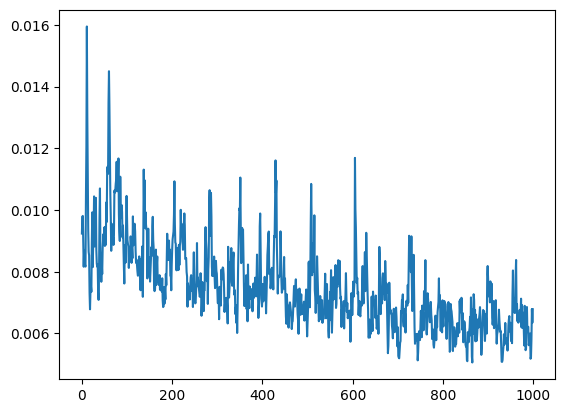

In [17]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot()